# Análise, Limpeza e Engenharia de Dados

In [75]:
##Bibliotecas úteis

import pandas as pd ## Para manipulação dos conjuntos de dados
import numpy as np ## Para 
import chardet ## Biblioteca para lidar com a codificação de caracteres
import matplotlib.pyplot as plt
import seaborn as sns
# para escala
from mlxtend.preprocessing import minmax_scaling
# Para transformação Box-Cox
from scipy import stats

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler


%matplotlib inline

## Abrir o conjunto de dados

In [2]:
weather_df = pd.read_csv('summary_of_weather.csv', index_col=0)

/home/nicoli/anaconda3/envs/credit_scudra_py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (8,9,19,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Visualizar o conjunto de dados

In [3]:
weather_df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Tem alguns dados faltando...

## Limpar o conjunto de dados
    --Lidar com dados faltantes, como: __NaN__ ou __None__
    --Remover colunas sujas

### -- Lidar com dados faltantes

#### Verificando o número de dados faltantes por coluna

In [4]:
weather_df.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

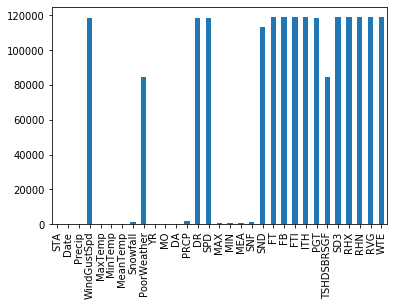

In [5]:
weather_df.isnull().sum().plot(kind='bar')

#### Verificando a porcentagem de dados faltantes

In [6]:
## Vamos checar a quantidade de linhas e colunas
weather_df.shape

(119040, 31)

In [7]:
## Agora, o número total de células no dataset
num_total_celulas_weather_df = np.product(weather_df.shape)
num_total_celulas_weather_df

3690240

In [8]:
## E o numero de células com números faltantes
num_celulas_faltantes = weather_df.isnull().sum().sum()
num_celulas_faltantes

1834179

In [9]:
print('Porcentagem de dados faltantes:',  100 * num_celulas_faltantes / num_total_celulas_weather_df)

Porcentagem de dados faltantes: 49.70351521852237


### Remover dados faltantes

Vamos começar removendo todas as __linhas__ que contém algum valor faltante

In [10]:
weather_df.dropna()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE


#### Eita! Não sobrou nenhuma linha!
Vamos tentar remover todas as __colunas__ que têm algum valor faltante:

In [11]:
weather_df_sem_nan = weather_df.dropna(axis=1)
weather_df_sem_nan.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,YR,MO,DA
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,42,7,1
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,42,7,2
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,42,7,3
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,42,7,4
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,42,7,5


Vamos ver a quantidade de dados perdidos:

In [12]:
print('Quantidade de colunas no dataset original:', weather_df.shape[1])
print('Quantidade de colunas sem valores faltantes:', weather_df_sem_nan.shape[1])

Quantidade de colunas no dataset original: 31
Quantidade de colunas sem valores faltantes: 9


Sobraram 9 colunas!
###### Conseguimos remover dados e continuar com uma parcela do dataset!
##### Mas quanto?

In [13]:
## Agora, o número total de células no dataset
num_total_celulas_weather_df = np.product(weather_df.shape)
print('num_total_celulas_weather_df', num_total_celulas_weather_df)

## E o numero de células com números faltantes
num_celulas_weather_df_sem_nan = np.product(weather_df_sem_nan.shape)
print('num_celulas_weather_df_sem_nan', num_celulas_weather_df_sem_nan)

print('Porcentagem de dados resultantes:',  100 *  num_celulas_weather_df_sem_nan / num_total_celulas_weather_df)

num_total_celulas_weather_df 3690240
num_celulas_weather_df_sem_nan 1071360
Porcentagem de dados resultantes: 29.032258064516128


#### Perdemos MUITO dado!

###### Vamos olhar mais atentamente para o conjunto de dados.
###### Quais dados não existem e quais não foram coletados?

-- Se o dado não existe, não faz sentido tentar adivinhar qual valor deveria estar ali

-- Se o dado não foi coletado, vale a pena tentar colocar algo na célula desfalcada

In [14]:
#Mostrando 5 amostras do dataset
weather_df.sample(5)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
20259,11601,1942-12-1,0.254,NaN,30.555556,25.555556,27.777778,0,1,42,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
39986,13007,1944-8-31,T,NaN,33.888889,19.444444,26.666667,0,NaN,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8322,10701,1945-8-2,24.638,NaN,32.222222,23.888889,27.777778,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
82298,33031,1945-3-31,0,NaN,25.555556,5.555556,15.555556,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70408,32603,1945-4-11,0,NaN,38.888889,19.444444,28.888889,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
### Escolha uma coluna e analise seus dados faltosos

#### Exemplo: coluna 'Snowfall'

In [16]:
### Ver quantos e quais dados não-nulos
pd.value_counts(weather_df['Snowfall'])

0.0        86090
0          29600
5.08         527
7.62         319
2.54         317
10.16        195
12.7          90
20.32         83
17.78         78
15.24         70
22.86         69
25.4          68
#VALUE!       44
27.94         40
30.48         31
45.72         25
50.8          24
2.54          22
48.26         22
35.56         20
33.02         15
60.96         13
7.62          11
66.04         11
38.1          11
53.34         10
43.18         10
10.16         10
5.08           7
63.5           7
40.64          6
55.88          6
58.42          5
76.2           5
81.28          4
15.24          4
12.7           2
78.74          2
68.58          1
83.82          1
86.36          1
73.66          1
Name: Snowfall, dtype: int64

In [17]:
weather_df.sort_values(by='Date', inplace=True)
weather_df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
57877,22508,1940-1-1,0.254,NaN,23.333333,17.222222,20.000000,0,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54500,22504,1940-1-1,2.286,NaN,26.666667,17.222222,22.222222,0,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6289,10701,1940-1-1,7.62,NaN,28.333333,22.222222,25.555556,0,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54509,22504,1940-1-10,0,NaN,26.111111,16.666667,21.111111,0,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6298,10701,1940-1-10,0,NaN,33.888889,22.777778,28.333333,0,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
weather_df['Snowfall'] = weather_df['Snowfall'].fillna(method='bfill', axis=0).fillna(0)

In [19]:
weather_df.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall            0
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [20]:
pd.value_counts(weather_df['Snowfall'])

0.0        86947
0          29879
5.08         537
7.62         321
2.54         320
10.16        198
12.7          91
20.32         83
17.78         78
15.24         71
22.86         71
25.4          68
#VALUE!       45
27.94         40
30.48         31
45.72         25
50.8          24
2.54          23
48.26         23
35.56         20
33.02         15
60.96         13
7.62          11
10.16         11
38.1          11
66.04         11
53.34         10
43.18         10
5.08           7
63.5           7
40.64          6
55.88          6
58.42          5
76.2           5
81.28          4
15.24          4
78.74          3
12.7           2
68.58          1
83.82          1
86.36          1
73.66          1
Name: Snowfall, dtype: int64

###### Tratar os valores que não são numéricos

In [21]:
weather_df.loc[:, 'Snowfall'].replace(0.0, 0, inplace=True)
weather_df.loc[:, 'Snowfall'].replace('0', 0, inplace=True)
weather_df.loc[:, 'Snowfall'].replace('#VALUE!', method='bfill', inplace=True)

In [22]:
pd.value_counts(weather_df['Snowfall'])

0        116870
5.08        537
7.62        321
2.54        320
10.16       198
12.7         91
20.32        83
17.78        78
15.24        71
22.86        71
25.4         69
27.94        40
30.48        31
45.72        25
50.8         24
48.26        23
2.54         23
35.56        20
33.02        15
60.96        13
38.1         11
10.16        11
7.62         11
66.04        11
53.34        10
43.18        10
63.5          7
5.08          7
55.88         6
40.64         6
58.42         5
76.2          5
81.28         4
15.24         4
78.74         3
12.7          2
83.82         1
86.36         1
68.58         1
73.66         1
Name: Snowfall, dtype: int64

#### -- Remover colunas com todos os valores nulos

In [23]:
weather_df.dropna(how='all', axis=1, inplace=True)

In [24]:
weather_df.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall            0
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
PGT            118515
TSHDSBRSGF      84803
dtype: int64

#### -- Aplicar fillna para todo o dataset

In [25]:
weather_df = weather_df.fillna(method='ffill', axis=0).fillna(0)

### -- Coluna Precip

In [26]:
pd.value_counts(weather_df['Precip'])

0          64267
T          16753
0.254       3389
0.508       2909
0.762       2015
1.016       1639
1.27        1451
1.524       1233
2.032       1059
1.778        986
2.54         927
2.286        827
3.048        725
2.794        693
3.81         606
3.302        602
3.556        573
4.572        501
5.08         500
4.064        489
4.318        485
4.826        390
5.334        386
6.35         383
5.588        382
5.842        364
6.096        357
6.604        324
7.112        303
7.62         297
           ...  
173.736        1
117.602        1
248.92         1
153.162        1
95.758         1
147.828        1
211.328        1
97.028         1
91.694         1
90.17          1
120.904        1
83.566         1
98.298         1
116.586        1
80.772         1
94.996         1
143.51         1
168.656        1
92.202         1
136.652        1
104.902        1
112.014        1
94.234         1
148.59         1
85.09          1
122.174        1
123.952        1
137.922       

###### Limpar dados não-numéricos da coluna

In [27]:
weather_df.loc[:,'Precip'].replace('T',0, inplace=True)

In [28]:
weather_df.sample(5)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,PGT,TSHDSBRSGF
3610,10102,1944-11-12,0.508,0.00,32.222222,23.333333,27.777778,0,1,44,...,0.02,0.0,0.0,90.0,74.0,82.0,0,0.0,0.0,1
86489,33303,1945-10-25,0,37.04,26.666667,15.000000,21.111111,0,1,45,...,0,54.0,20.0,80.0,59.0,70.0,0,0.0,17.4,1
68733,32601,1942-11-24,0,0.00,30.000000,11.666667,21.111111,0,0,42,...,0,0.0,0.0,86.0,53.0,70.0,0,0.0,0.0,0
9795,10704,1944-9-14,2.032,0.00,28.333333,22.777778,25.555556,0,1,44,...,0.08,0.0,0.0,83.0,73.0,78.0,0,0.0,0.0,1
93018,34111,1944-4-16,0,0.00,21.666667,6.666667,14.444444,0,1,44,...,0,0.0,0.0,71.0,44.0,58.0,0,0.0,0.0,1


###### Mudar tipo da coluna

In [48]:
weather_df.Precip = weather_df.Precip.astype(float)

## Engenharia de Dados

##### Tratamento de Datas

In [ ]:
### Sua vez! Trate a coluna Date



In [ ]:
### Sua vez! monte uma coluna nova com o mês 



In [ ]:
### Sua vez! monte uma coluna nova com o valor da precipitação do mês anterior



## Escala e Padronização

### Escala

Text(0.5, 1.0, 'Dados em Escala')

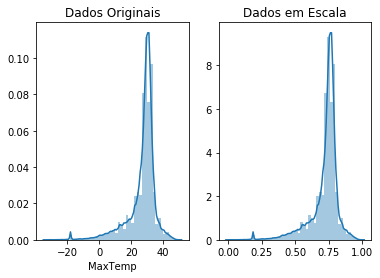

In [29]:
weather_df_MaxTemp = weather_df.MaxTemp

# Colocar em escala de 0 a 1
scaled_data = minmax_scaling(weather_df_MaxTemp, columns = [0])

# plotar os dados originais e em escala
fig, ax=plt.subplots(1,2)
sns.distplot(weather_df_MaxTemp, ax=ax[0])
ax[0].set_title("Dados Originais")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Dados em Escala")

In [30]:
# Sua vez! 
# Aplique a função scale para a coluna "MinTemp"


In [31]:
## Sua vez! 
## Identifique as colunas de dados numéricos utilizando a biblioteca pandas e numpy




In [32]:
## Sua vez! Aplique a função scale para todas as colunas de dados numéricos

numeric_columns = list(weather_df.select_dtypes(include=[np.number]).columns)
numeric_columns.remove('STA')
numeric_columns.remove('YR')
numeric_columns.remove('MO')
numeric_columns.remove('DA')

In [33]:
scaled_columns = minmax_scaling(weather_df[numeric_columns], numeric_columns)

In [34]:
scaled_columns.head()

,WindGustSpd,MaxTemp,MinTemp,MeanTemp,DR,SPD,MAX,MIN,MEA,SND,PGT
57877,0.0,0.680000,0.763359,0.735294,0.0,0.0,0.680000,0.763359,0.735294,NaN,0.0
54500,0.0,0.720000,0.763359,0.764706,0.0,0.0,0.720000,0.763359,0.764706,NaN,0.0
6289,0.0,0.740000,0.832061,0.808824,0.0,0.0,0.740000,0.832061,0.808824,NaN,0.0
54509,0.0,0.713333,0.755725,0.750000,0.0,0.0,0.713333,0.755725,0.750000,NaN,0.0
6298,0.0,0.806667,0.839695,0.845588,0.0,0.0,0.806667,0.839695,0.845588,NaN,0.0


### Normalização

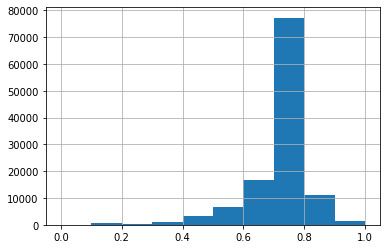

In [57]:
scaled_columns['MaxTemp'].hist()

Text(0.5, 1.0, 'Dados Normalizados')

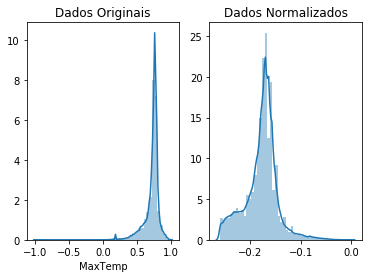

In [72]:
# normalize the exponential data with boxcox

scaled_maxtemp = scaled_columns['MaxTemp']

normalized_data = stats.boxcox(scaled_maxtemp[scaled_maxtemp>0])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(scaled_maxtemp, ax=ax[0])
ax[0].set_title("Dados Originais")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Dados Normalizados")

In [42]:
# Sua vez! 
# Normalize a coluna "MinTemp"


In [34]:
## Sua vez! Normalize todas as colunas de dados numéricos




###### Sem usar biblioteca:

Text(0.5, 1.0, 'Dados Normalizados')

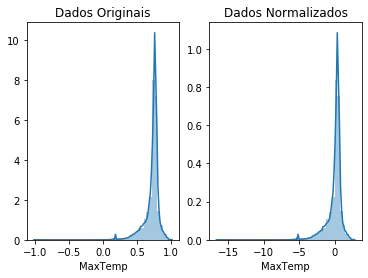

In [78]:
# normalize the exponential data with boxcox

scaled_maxtemp = scaled_columns['MaxTemp']

normalized_data = ( scaled_maxtemp - scaled_maxtemp.mean() ) / scaled_maxtemp.std()

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(scaled_maxtemp, ax=ax[0])
ax[0].set_title("Dados Originais")
sns.distplot(normalized_data, ax=ax[1])
ax[1].set_title("Dados Normalizados")

## PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(weather_df)

In [ ]:
targets = [] # definir que colunas se deseja ver

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## One Hot Encoder

#### Via sklearn

In [113]:
one_hot_encoder = OneHotEncoder(categories='auto')
ohe_month = one_hot_encoder.fit_transform(weather_df['Month'].values.reshape(-1,1)).toarray()
ohe_month_df = pd.DataFrame(ohe_month, columns=['month_' + str(i) for i in range(ohe_month.shape[1])])

In [114]:
weather_df_month_ohe = pd.concat([weather_df, ohe_month_df],axis=1)

###### Via pandas

In [92]:
ohe_month = pd.get_dummies(weather_df['Month'], dummy_na=True)
weather_df_month_ohe = pd.concat([weather_df, ohe_month],axis=1)

In [93]:
weather_df_month_ohe.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,nan
57877,22508,1940-01-01,0.254,0.0,23.333333,17.222222,20.000000,0,0,40,...,0,0,0,0,0,0,0,0,0,0
54500,22504,1940-01-01,2.286,0.0,26.666667,17.222222,22.222222,0,0,40,...,0,0,0,0,0,0,0,0,0,0
6289,10701,1940-01-01,7.620,0.0,28.333333,22.222222,25.555556,0,0,40,...,0,0,0,0,0,0,0,0,0,0
54509,22504,1940-01-10,0.000,0.0,26.111111,16.666667,21.111111,0,0,40,...,0,0,0,0,0,0,0,0,0,0
6298,10701,1940-01-10,0.000,0.0,33.888889,22.777778,28.333333,0,0,40,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Faça OHE para a coluna YR. Escolha um método de sua preferência.


